# Logistic-Regression- Assignment 06

## Output variable - y, Whether the client has subscribed a term deposit or not? (Binomial ("yes" or "no"))

In [33]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#Import the data
import os
#os.getcwd()
os.chdir('C:\\Users\\hp\\Desktop\\Assign 6')
data = pd.read_csv('bank-full.csv',delimiter= ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [3]:
data.shape

(45211, 17)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data[data.duplicated()==True]# No duplicate rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data1 = data.copy()
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Converting categorical to numeric

### 1. Binary method for binary output variables

In [9]:
#Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data['default']== 'yes', 1, 0)
data1['housing'] = np.where(data['housing']== 'yes', 1, 0)
data1['loan'] = np.where(data['loan']== 'yes', 1, 0)
data1['y'] = np.where(data['y']== 'yes', 1, 0)

In [10]:
data1.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [11]:
# replacing categorical month names to numerical
month_cat ={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
data1= data1.replace(month_cat)
data1['month']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int32
dtypes: int32(4), int64(8), object(5)
memory usage: 5.2+ MB


### 2. One-hot encoding for categories more than 2

In [13]:
# One-Hot Encoding of categrical variables
data2=pd.get_dummies(data1,columns=['job','marital','education','contact','poutcome'],drop_first= True)
data2

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,1,0,0,1,0,0,0,1


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
age                    45211 non-null int64
default                45211 non-null int32
balance                45211 non-null int64
housing                45211 non-null int32
loan                   45211 non-null int32
day                    45211 non-null int64
month                  45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
y                      45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technic

In [15]:
data3 = data2.copy()
data3.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [16]:
#oredering the columns to slice easielyfor X and Y
# shift column 'y' to first position
y_column = data3.pop('y')
  
# insert column using insert(position,column_name,y_column) function
data3.insert(32, 'y', y_column)
display(data3)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,1,0,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,1,1,0,0,0,1,0,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,1,0,0,0,1,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,1,0,1,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,0,1,0,0,0,0,0,1,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,0,0,0,0,0,1,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,0,1,0,0,0,0,0,1,0,1
45209,57,0,668,0,0,17,11,508,4,-1,...,0,1,0,0,1,0,0,0,1,0


## Model Building

In [17]:
#Splitting X and Y
X = data3.iloc[:,:32]
Y = data3.iloc[:,32:]

In [18]:
#Build ligistic regression model
classifier = LogisticRegression(random_state=20)
classifier.fit(X,Y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=20, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Model coefficients
classifier.coef_

array([[-3.26775191e-04, -1.52225246e-01,  1.87850367e-05,
        -7.72003535e-01, -5.64218840e-01, -4.75645983e-03,
        -2.04031116e-02,  4.03684946e-03, -1.06606977e-01,
        -1.94663074e-04,  8.81941197e-03, -4.41728983e-01,
        -4.87021306e-01, -5.44329041e-01, -2.43219227e-01,
         3.41023251e-01, -3.80025904e-01, -3.32377399e-01,
         4.46641277e-01, -2.84925604e-01, -2.56041136e-01,
        -2.18913412e-01, -1.95785463e-01,  1.14108681e-01,
         1.08864983e-01,  3.34233792e-01,  2.04231164e-01,
        -7.67468976e-02, -1.16644351e+00,  1.83076680e-01,
         2.23229033e+00, -3.65054134e-01]])

In [20]:
#Predicting the probalility based on X
classifier.predict_proba(X)

array([[0.97403302, 0.02596698],
       [0.98305997, 0.01694003],
       [0.9956658 , 0.0043342 ],
       ...,
       [0.01458593, 0.98541407],
       [0.8476638 , 0.1523362 ],
       [0.80329107, 0.19670893]])

## Prediction

In [21]:
# Adding the predicted values to data
y_pred = classifier.predict(X)
data3['y_pred'] = y_pred
data3.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y,y_pred
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,1,0,0,1,0,0
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,1,0,0,1,0,0
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,1,0,0,1,0,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,1,0,0,1,0,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,1,0,0,1,0,0


In [22]:
#Calculating probabilities, converting them to data frame and concatenating to the data
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
data4 = pd.concat([data3,y_prob], axis=1)
data4.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y,y_pred,0,1
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,1,0,0,1,0,0,0.974033,0.025967
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,1,0,0,1,0,0,0.983060,0.016940
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,1,0,0,1,0,0,0.995666,0.004334
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,1,0,0,1,0,0,0.990470,0.009530
4,33,0,1,0,0,5,5,198,1,-1,...,1,0,1,0,0,1,0,0,0.949541,0.050459


In [23]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
age                    45211 non-null int64
default                45211 non-null int32
balance                45211 non-null int64
housing                45211 non-null int32
loan                   45211 non-null int32
day                    45211 non-null int64
month                  45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemplo

## Accuracy and model validation

In [24]:
# Confusion matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[38995   927]
 [ 3577  1712]]


In [25]:
# Accuracy
accuracy_score(Y,y_pred)

0.9003782265377894

In [26]:
# The model accuracy is calculated by (TP+TN)/(TP+FP+FN+TN)
(38995+1712)/(38995+1712+927+3577)

0.9003782265377894

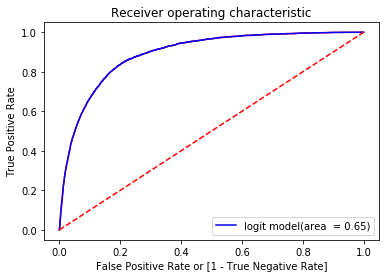

auc accuracy: 0.6502351996110699


In [27]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y,y_pred)

plt.plot(fpr,tpr,color='blue',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print('auc accuracy:',auc)

In [35]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.89     45211

